<a href="https://colab.research.google.com/github/Iqbalnm786/EDA/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
df=pd.read_csv("/content/irrigation_prediction.csv")
df


,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Silt,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,Sugarcane,Sowing,Kharif,Drip,Groundwater,2.62,Yes,92.44,South,Low
9996,Clay,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,Maize,Sowing,Kharif,Rainfed,Groundwater,4.87,No,15.46,South,Low
9997,Loamy,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,Potato,Harvest,Kharif,Canal,Groundwater,10.08,Yes,116.36,North,Low
9998,Loamy,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,Sugarcane,Harvest,Kharif,Rainfed,Reservoir,11.11,Yes,118.17,East,Low


In [10]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numeric_cols,categorical_cols

(['Soil_pH',
  'Soil_Moisture',
  'Organic_Carbon',
  'Electrical_Conductivity',
  'Temperature_C',
  'Humidity',
  'Rainfall_mm',
  'Sunlight_Hours',
  'Wind_Speed_kmh',
  'Field_Area_hectare',
  'Previous_Irrigation_mm'],
 ['Soil_Type',
  'Crop_Type',
  'Crop_Growth_Stage',
  'Season',
  'Irrigation_Type',
  'Water_Source',
  'Mulching_Used',
  'Region',
  'Irrigation_Need'])

In [13]:
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes

df_encoded

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,0,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,5,3,1,2,2,4.73,1,1.98,3,1
1,3,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,1,0,2,0,0,12.22,1,33.56,0,2
2,2,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,0,1,1,1,2,5.52,1,34.62,3,1
3,0,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,5,2,0,0,2,1.43,1,84.03,2,2
4,0,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,0,2,2,0,3,2.52,0,60.86,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,7.01,26.67,0.86,0.76,27.61,52.20,1075.12,7.41,19.66,4,2,0,1,0,2.62,1,92.44,3,1
9996,0,5.40,49.44,0.90,1.19,34.03,52.31,1591.84,9.86,5.66,1,2,0,2,0,4.87,0,15.46,3,1
9997,1,4.97,60.63,0.99,1.30,36.68,68.16,2384.87,10.75,13.40,2,1,0,0,0,10.08,1,116.36,2,1
9998,1,7.12,44.33,1.56,1.08,31.50,64.83,2397.01,4.03,3.05,4,1,0,2,2,11.11,1,118.17,1,1


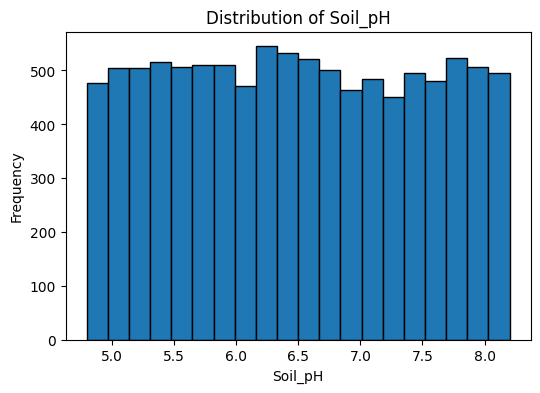

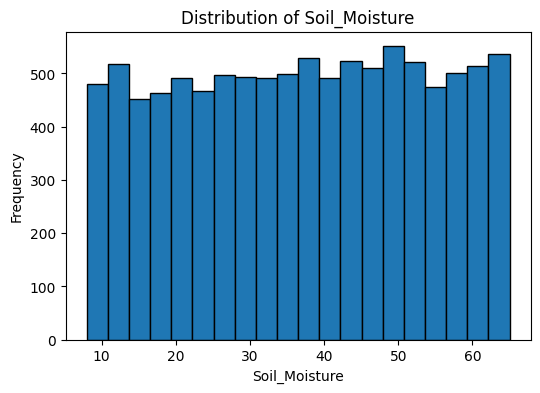

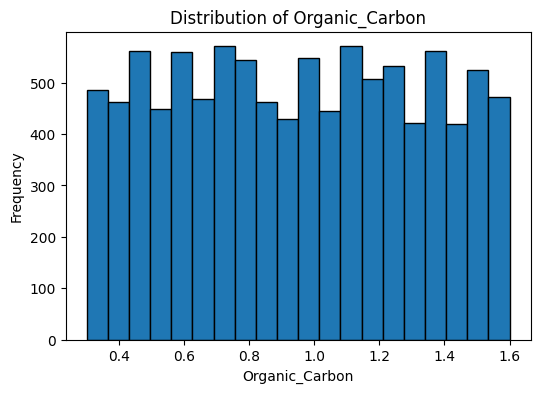

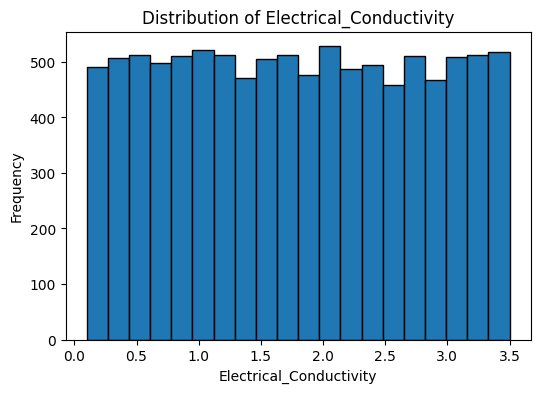

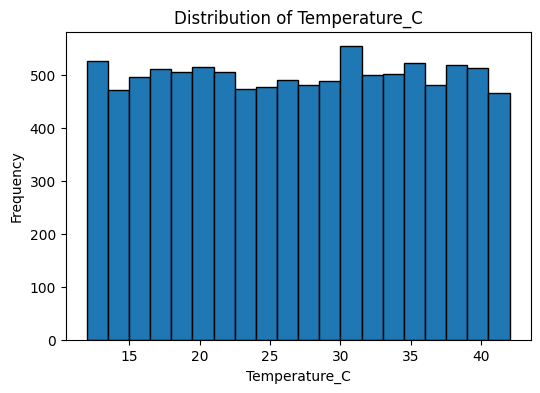

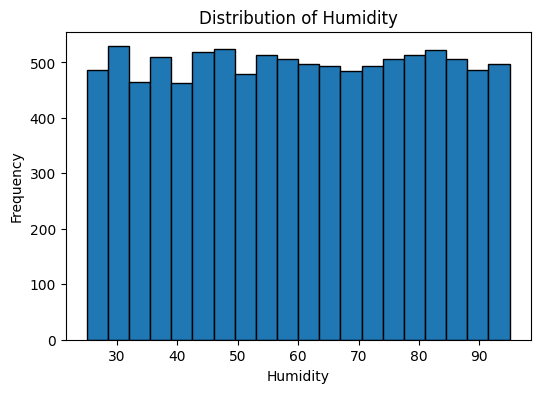

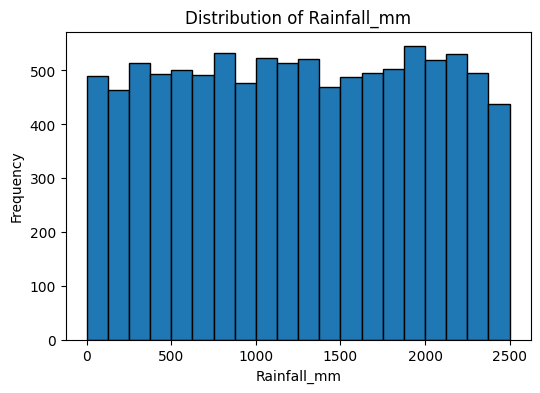

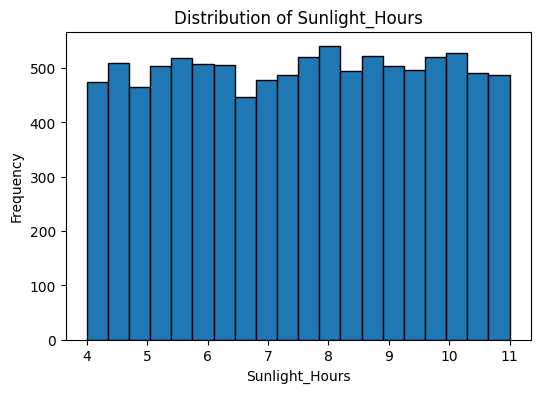

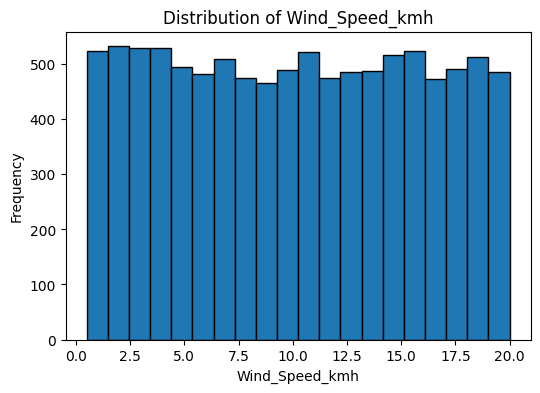

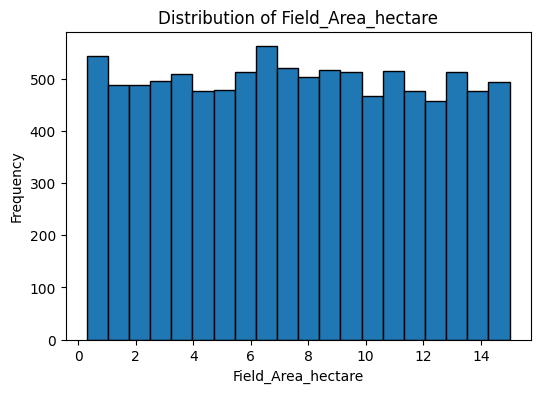

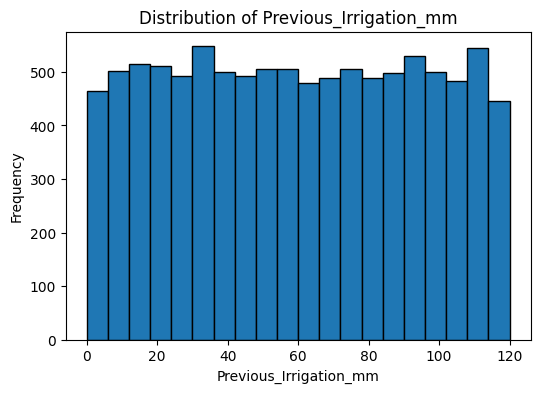

In [34]:
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col],bins=20,edgecolor="black")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


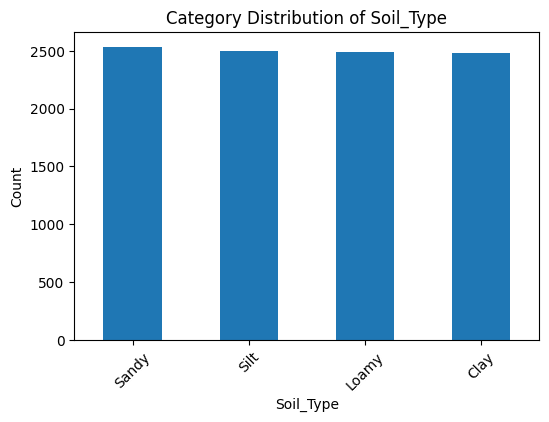

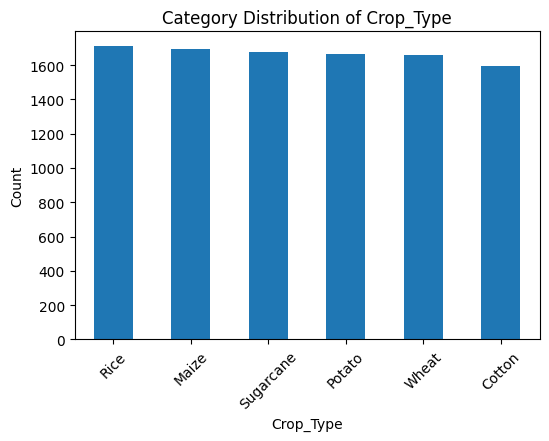

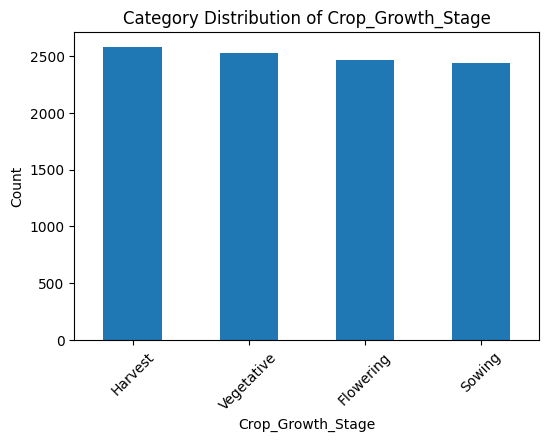

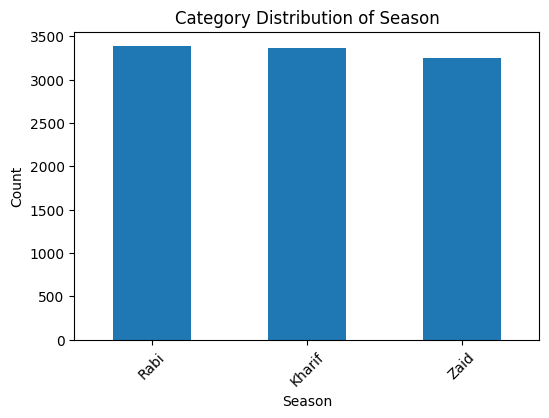

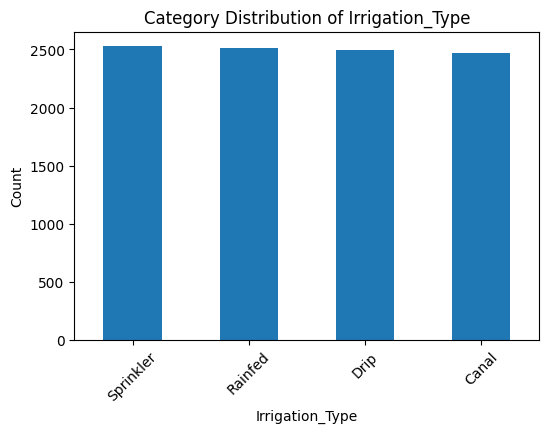

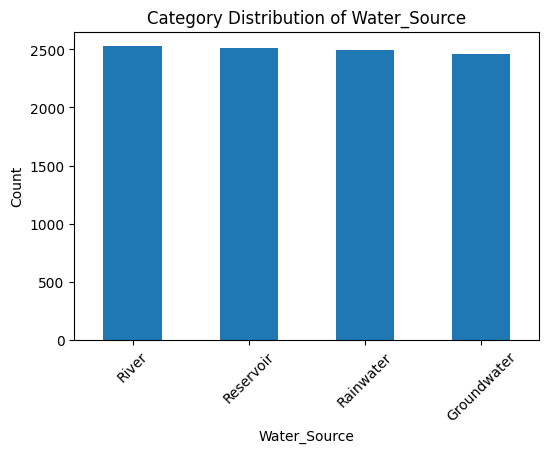

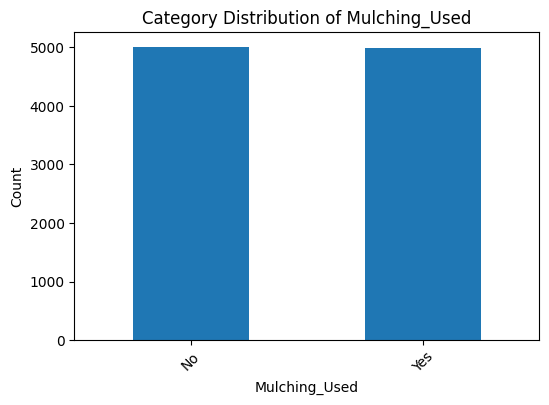

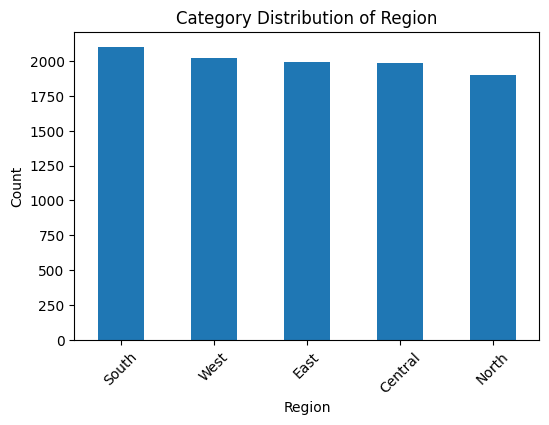

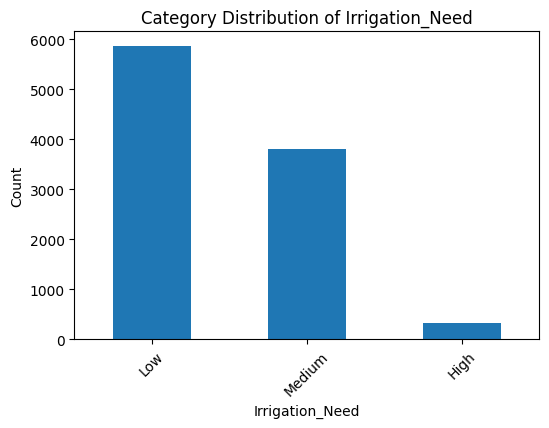

In [35]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Category Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    plt.show()


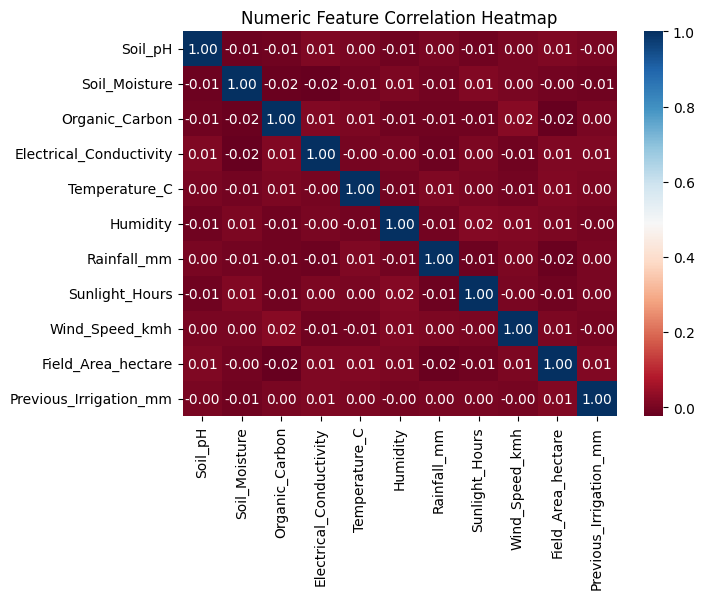

In [43]:
import seaborn as sns

corr = df[numeric_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True,fmt=".2f",cmap="RdBu")
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

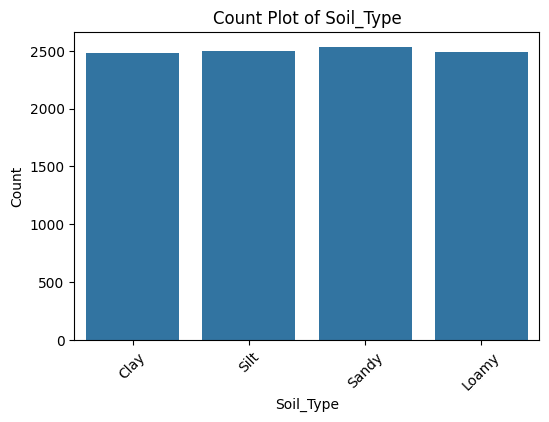

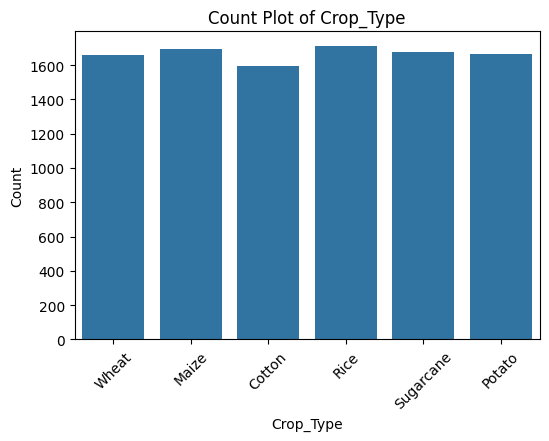

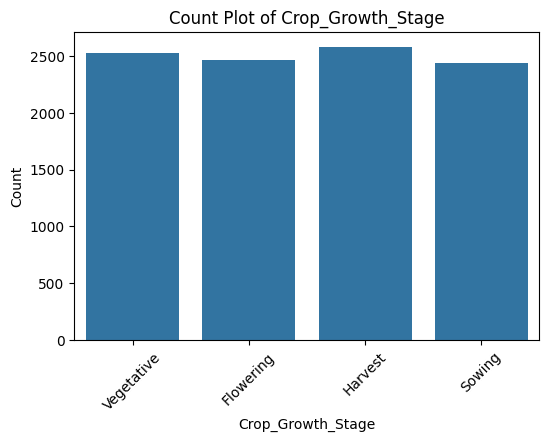

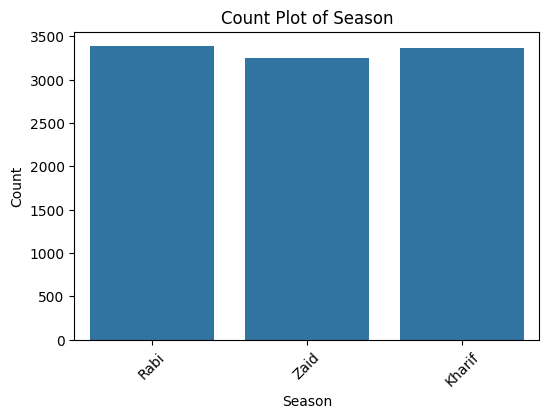

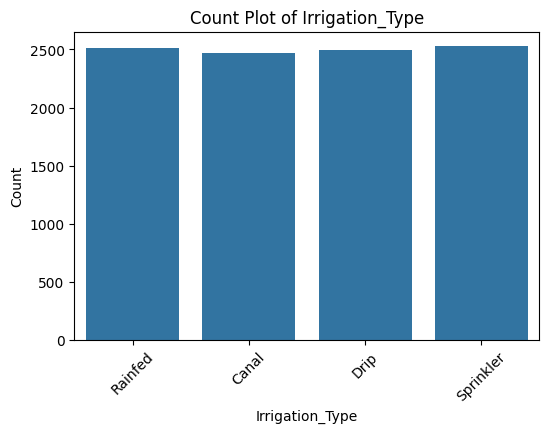

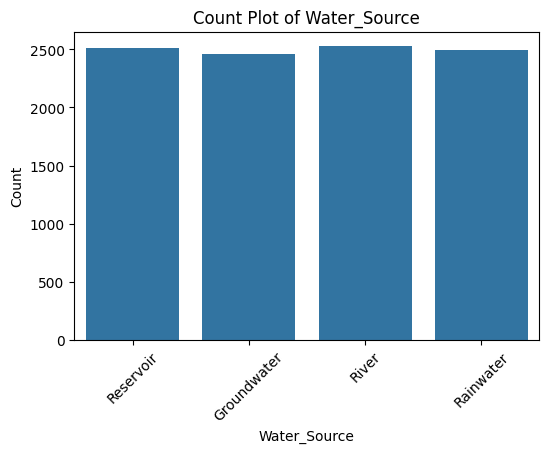

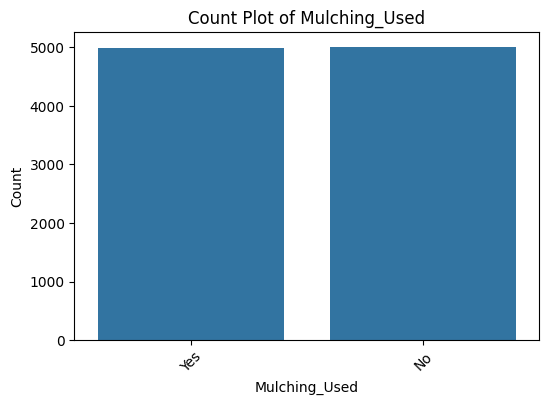

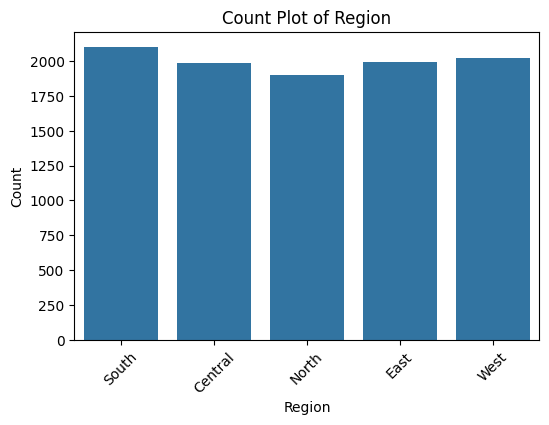

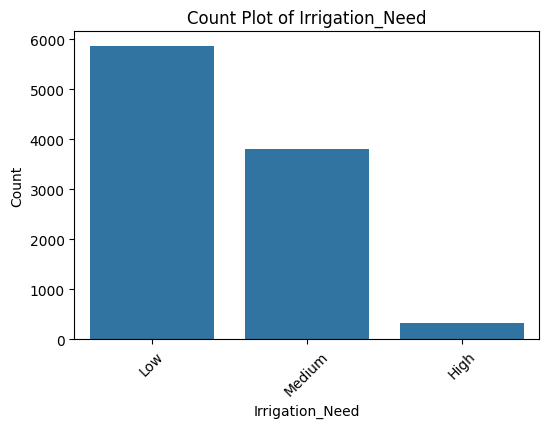

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


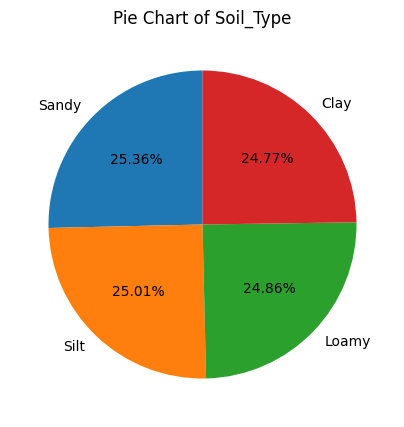

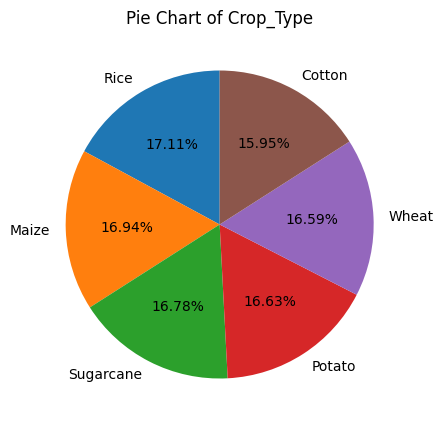

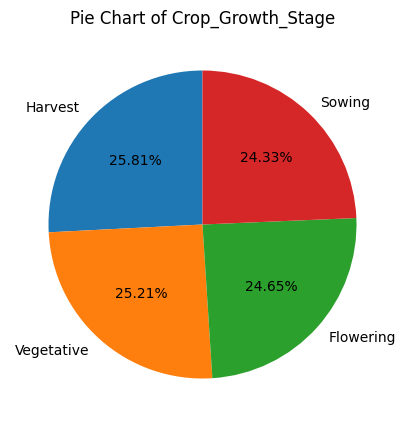

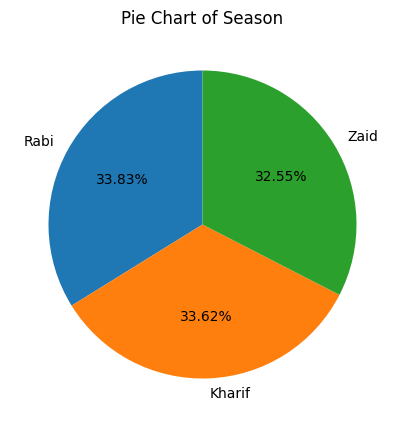

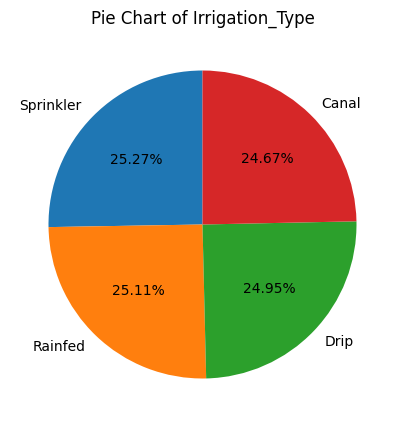

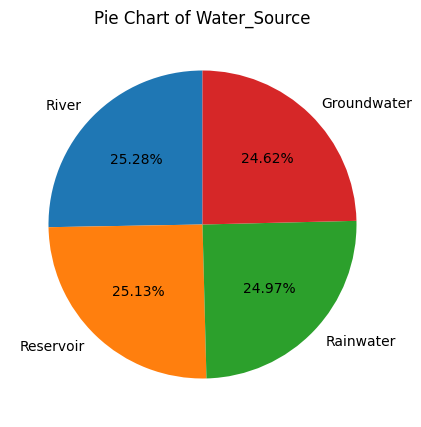

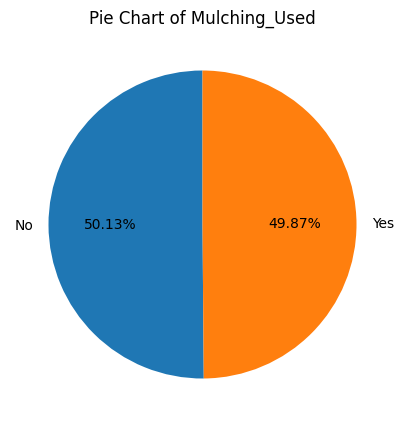

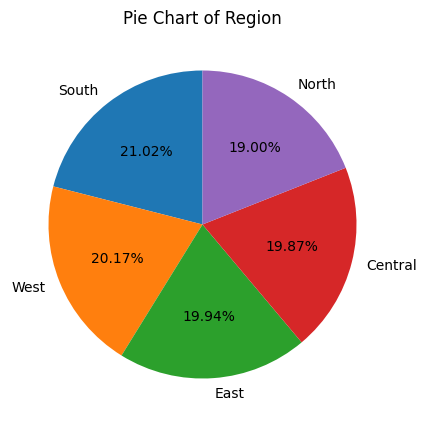

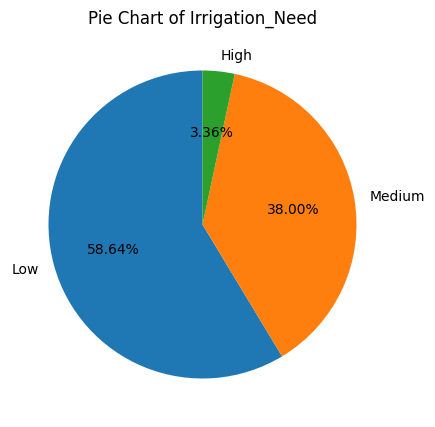

In [47]:
for col in categorical_cols:
    plt.figure(figsize=(5,5))
    df[col].value_counts().plot(
        kind="pie",
        autopct="%.2f%%",
        startangle=90
    )
    plt.title(f"Pie Chart of {col}")
    plt.ylabel("")   # remove default ylabel
    plt.show()


In [48]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le


In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,0,0.394118,0.499649,0.092308,0.608824,0.330000,0.088429,0.467057,0.001429,0.075385,5,3,1,2,2,0.301361,1,0.016337,3,1
1,3,0.473529,0.746667,0.061538,0.038235,0.816667,0.014429,0.332452,0.960000,0.836923,1,0,2,0,0,0.810884,1,0.279570,0,2
2,2,0.855882,0.562632,0.607692,0.611765,0.994333,0.734429,0.737832,0.535714,0.950256,0,1,1,1,2,0.355102,1,0.288405,3,1
3,0,0.341176,0.083333,0.969231,0.088235,0.840667,0.261714,0.122386,0.700000,0.561026,5,2,0,0,2,0.076871,1,0.700258,2,2
4,0,0.870588,0.185614,0.500000,0.711765,0.346000,0.877714,0.750307,0.912857,0.551795,0,2,2,0,3,0.151020,0,0.507127,3,2


In [55]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


In [58]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}


In [62]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [60]:
report = pd.DataFrame(results)
report = report.sort_values(by="F1 Score", ascending=False)
report


,Model,Accuracy,Precision,Recall,F1 Score
3,Gradient Boosting,0.9965,0.996532,0.9965,0.996412
1,Decision Tree,0.9955,0.995512,0.9955,0.995504
2,Random Forest,0.9865,0.986823,0.9865,0.985616
4,AdaBoost,0.8905,0.914995,0.8905,0.885162
6,SVM,0.8150,0.788860,0.8150,0.801639
7,Naive Bayes,0.8060,0.809436,0.8060,0.792987
0,Logistic Regression,0.7220,0.719467,0.7220,0.714303
5,KNN,0.6660,0.644166,0.6660,0.648512


from matplotlib import pyplot as plt
report['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
report['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
report['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
report['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
report.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
report.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
report.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
report.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
report['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
report['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
report['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
report['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(report['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(report, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(report['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(report, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(report['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(report, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(report['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(report, x='F1 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Accuracy', y='Precision', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Precision', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Recall', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

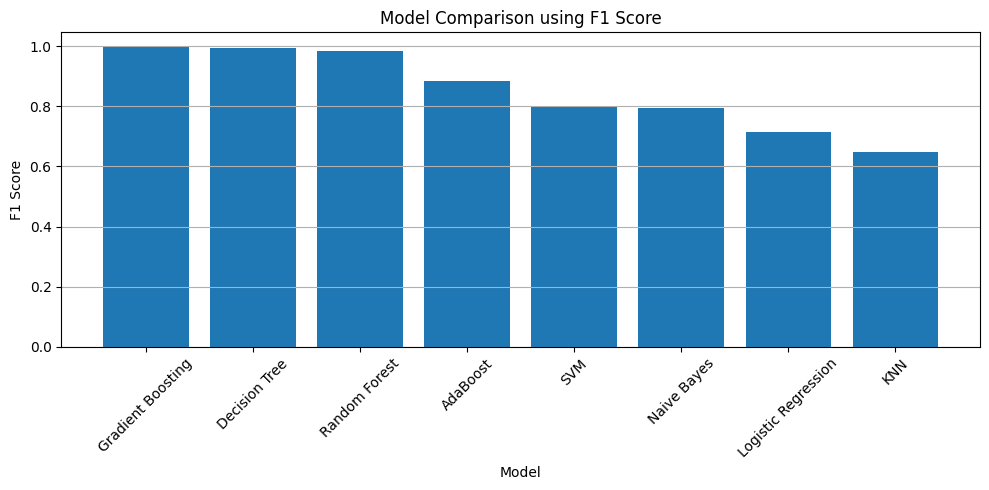

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(report["Model"], report["F1 Score"])
plt.title("Model Comparison using F1 Score")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()
